# Buscador de Llaves
### Ejemplo de Aplicación
Pensemos en un sistema que permita ser localizado a partir de la emisión de un sonido de alarma disparado ante la detección de un silbido.
Encuadremos nuestra aplicación en pensandolo como un producto que deberá competir con otros en precio y prestaciones.
Con el fin de simplificar el diseño mecánico del sistema, el dispositivo deberá detenerse cuando detecte 3 (tres) silbidos consecutivos.
<center><img src="silbido.png"></center>

Para manipular los archivos de audio desde la jupyter notebook se recomineda instalar *librosa*.


conda install -c conda-forge librosa

In [4]:
from scipy import fft
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [5]:
Audio(filename='1_silbido.wav')

In [6]:
Audio(filename ='3_silbido-artificial.wav')

In [7]:

def analizar_audio(filename):
    
    fs, data = wavfile.read(filename) # frecuencia de muestreo y datos de la señal

    # Definición de parámetro temporales
    ts = 1 / fs                     # tiempo de muestreo
    N = len(data)                   # número de muestras en el archivo de audio
    t = np.linspace(0, N * ts, N)   # vector de tiempo
    senial = data#[:, 1]            # se extrae un canal de la pista de audio (si el audio es estereo)
    senial = senial * 3.3 / (2 ** 16 - 1) # se escala la señal a voltios (considerando un CAD de 16bits y Vref 3.3V)
    
    
    #################### Cálculo de la Transformada de Fourier ###################
    
    freq = fft.fftfreq(N, d=1/fs)   # se genera el vector de frecuencias
    senial_fft = fft.fft(senial)    # se calcula la transformada rápida de Fourier
    
    # El espectro es simétrico, nos quedamos solo con el semieje positivo
    f = freq[np.where(freq >= 0)]      
    senial_fft = senial_fft[np.where(freq >= 0)]
    
    # Se calcula la magnitud del espectro
    senial_fft_mod = np.abs(senial_fft) / N     # Respetando la relación de Parseval
    # Al haberse descartado la mitad del espectro, para conservar la energía 
    # original de la señal, se debe multiplicar la mitad restante por dos (excepto
    # en 0 y fm/2)
    senial_fft_mod[1:len(senial_fft_mod-1)] = 2 * senial_fft_mod[1:len(senial_fft_mod-1)]
    if len(senial_fft_mod) > 2:
        senial_fft_mod[1:-1] = 2 * senial_fft_mod[1:-1]
    
    return t, senial, f, senial_fft_mod


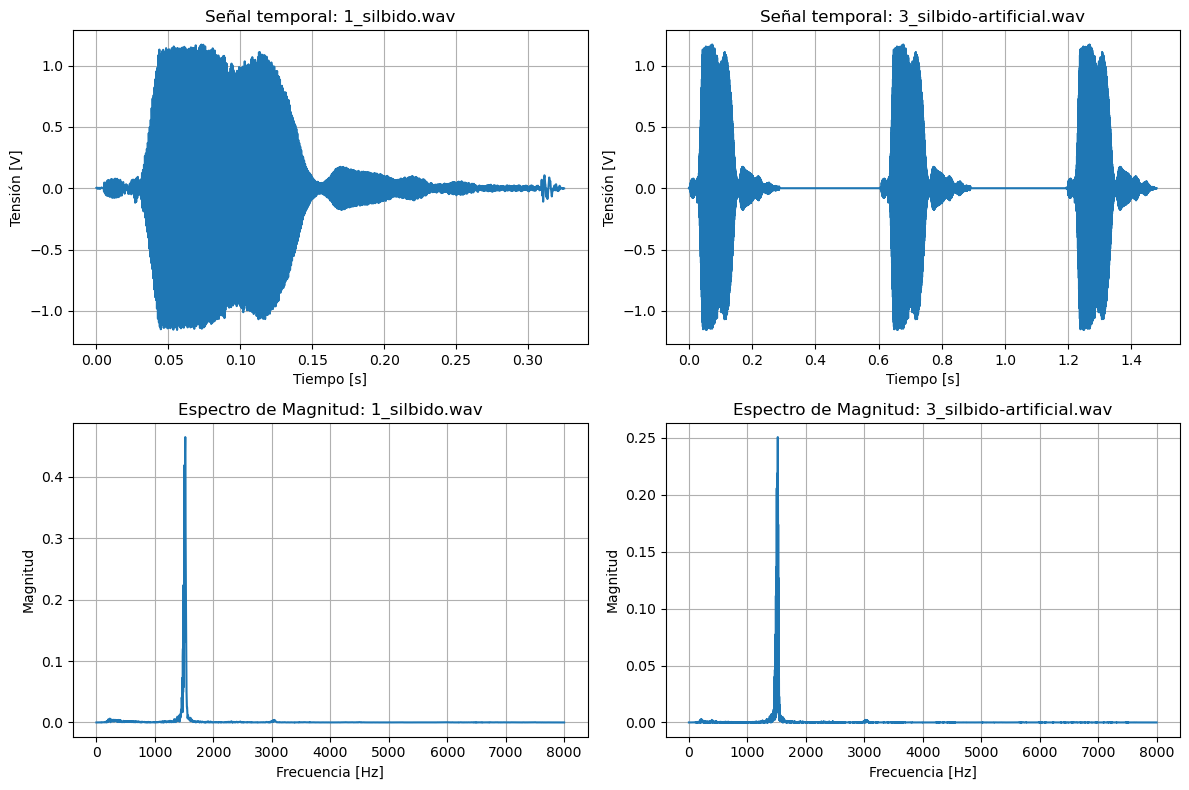

In [8]:
# Archivos a analizar
archivos = ['1_silbido.wav', '3_silbido-artificial.wav']

plt.figure(figsize=(12, 8))

for i, archivo in enumerate(archivos):
    t, senial, f, senial_fft_mod = analizar_audio(archivo)
    
    # Gráfica señal temporal
    plt.subplot(2, 2, i+1)
    plt.plot(t, senial)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Tensión [V]')
    plt.title(f'Señal temporal: {archivo}')
    plt.grid()
    
    # Gráfica espectro de magnitud
    plt.subplot(2, 2, i+3)
    plt.plot(f, senial_fft_mod)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud')
    plt.title(f'Espectro de Magnitud: {archivo}')
    plt.grid()

plt.tight_layout()
plt.show()